In [29]:
import numpy as np
import pandas as pd
import operator
import pickle
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn import metrics, cross_validation
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
#with open('../../Data/Opioids/Model_Data/subject_details_age.pickle', 'rb') as pickler:
 #   subject_details = pickle.load(pickler)
subject_details = pd.read_pickle('../../Data/Opioids/Model_Data/subject_details_age.pickle')
#subject_details = pd.read_pickle('subject_details_age.pickle')
subject_details.drop(["AGE"], axis=1, inplace=True)
subject_details.head()

,SUBJECT_ID,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,...,MEPERIDINE,HYDROMORPHONE,HYDROCODONE,FENTANYL,CODEINE,BUPRENORPHINE,METHADONE,NALOXONE,SIDE_EFFECTS_FLAG,AGE_GROUP
0,249,0,0,8.0,0.0,1,0,1,0.0,4.0,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,250,0,1,6.0,0.0,1,0,1,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,3
2,252,1,0,4.0,0.0,1,0,1,0.0,0.0,...,2.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,5
3,255,1,0,2.0,0.0,1,0,0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,256,1,0,22.0,0.0,1,0,1,0.0,31.0,...,0.0,5.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,7


In [6]:
subject_details.isnull().any()

SUBJECT_ID                          False
GENDER                              False
EXPIRE_FLAG                         False
TOTAL_NARCOTIC_PRESCRIPTONS         False
TOTAL_ANTI_NARCOTIC_PRESCRIPTONS    False
NARCOTIC                            False
ANTI-NARCOTIC                       False
ICU_STAY                            False
OXYMORPHONE                         False
OXYCODONE                           False
MORPHINE                            False
MEPERIDINE                          False
HYDROMORPHONE                       False
HYDROCODONE                         False
FENTANYL                            False
CODEINE                             False
BUPRENORPHINE                       False
METHADONE                           False
NALOXONE                            False
SIDE_EFFECTS_FLAG                   False
AGE_GROUP                           False
dtype: bool

### Normalizing the values

In [7]:
x = subject_details.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
subject_details_normalized = pd.DataFrame(x_scaled)
subject_details_normalized.columns=subject_details.columns
subject_details_normalized.drop(["SUBJECT_ID","AGE_GROUP"], axis=1, inplace=True)
subject_details_normalized["AGE_GROUP"] = subject_details["AGE_GROUP"].values
subject_details_normalized["SUBJECT_ID"] = subject_details["SUBJECT_ID"].values
subject_details_normalized.head()

,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,MORPHINE,...,HYDROMORPHONE,HYDROCODONE,FENTANYL,CODEINE,BUPRENORPHINE,METHADONE,NALOXONE,SIDE_EFFECTS_FLAG,AGE_GROUP,SUBJECT_ID
0,0.0,0.0,0.020305,0.0,1.0,0.0,1.0,0.0,0.010499,0.037694,...,0.013857,0.0,0.000000,0.0,0.0,0.090024,0.0,0.0,7,249
1,0.0,1.0,0.015228,0.0,1.0,0.0,1.0,0.0,0.000000,0.004435,...,0.000000,0.0,0.006754,0.0,0.0,0.090024,0.0,0.0,3,250
2,1.0,0.0,0.010152,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.006303,0.0,0.0,0.090024,0.0,0.0,5,252
3,1.0,0.0,0.005076,0.0,1.0,0.0,0.0,0.0,0.010499,0.008869,...,0.000000,0.0,0.000000,0.0,0.0,0.090024,0.0,0.0,7,255
4,1.0,0.0,0.055838,0.0,1.0,0.0,1.0,0.0,0.081365,0.008869,...,0.005774,0.0,0.004052,0.0,0.0,0.090024,0.0,0.0,7,256


In [8]:
cols = subject_details_normalized.columns.tolist()
cols = cols[-1:] + cols[:-1]
subject_details_normalized = subject_details_normalized[cols]
subject_details_normalized.head()

,SUBJECT_ID,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,...,MEPERIDINE,HYDROMORPHONE,HYDROCODONE,FENTANYL,CODEINE,BUPRENORPHINE,METHADONE,NALOXONE,SIDE_EFFECTS_FLAG,AGE_GROUP
0,249,0.0,0.0,0.020305,0.0,1.0,0.0,1.0,0.0,0.010499,...,0.000000,0.013857,0.0,0.000000,0.0,0.0,0.090024,0.0,0.0,7
1,250,0.0,1.0,0.015228,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.006754,0.0,0.0,0.090024,0.0,0.0,3
2,252,1.0,0.0,0.010152,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.015625,0.000000,0.0,0.006303,0.0,0.0,0.090024,0.0,0.0,5
3,255,1.0,0.0,0.005076,0.0,1.0,0.0,0.0,0.0,0.010499,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.090024,0.0,0.0,7
4,256,1.0,0.0,0.055838,0.0,1.0,0.0,1.0,0.0,0.081365,...,0.000000,0.005774,0.0,0.004052,0.0,0.0,0.090024,0.0,0.0,7


### One hot encoding for age

In [9]:
subject_details_normalized["AGE_GROUP"] = subject_details_normalized["AGE_GROUP"].astype('category', categories=[1,2,3,4,5,6,7,8])
age_group_df = pd.get_dummies(subject_details_normalized["AGE_GROUP"])
age_group_df.columns=["AGE_1", "AGE_2", "AGE_3", "AGE_4", "AGE_5", "AGE_6", "AGE_7", "AGE_8"]
subject_details_normalized = pd.merge(subject_details_normalized, age_group_df, left_index=True, how='left', right_index=True)
subject_details_normalized.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


,SUBJECT_ID,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,...,SIDE_EFFECTS_FLAG,AGE_GROUP,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,AGE_7,AGE_8
0,249,0.0,0.0,0.020305,0.0,1.0,0.0,1.0,0.0,0.010499,...,0.0,7,0,0,0,0,0,0,1,0
1,250,0.0,1.0,0.015228,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.0,3,0,0,1,0,0,0,0,0
2,252,1.0,0.0,0.010152,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.0,5,0,0,0,0,1,0,0,0
3,255,1.0,0.0,0.005076,0.0,1.0,0.0,0.0,0.0,0.010499,...,0.0,7,0,0,0,0,0,0,1,0
4,256,1.0,0.0,0.055838,0.0,1.0,0.0,1.0,0.0,0.081365,...,0.0,7,0,0,0,0,0,0,1,0


### Preparing the train and test data

In [10]:
X = subject_details_normalized[['GENDER', 'EXPIRE_FLAG', 'TOTAL_NARCOTIC_PRESCRIPTONS',
       'TOTAL_ANTI_NARCOTIC_PRESCRIPTONS', 'NARCOTIC', 'ANTI-NARCOTIC',
       'ICU_STAY', 'OXYMORPHONE', 'OXYCODONE', 'MORPHINE', 'MEPERIDINE',
       'HYDROMORPHONE', 'HYDROCODONE', 'FENTANYL', 'CODEINE', 'BUPRENORPHINE',
       'METHADONE', 'NALOXONE', 'AGE_1', 'AGE_2', 'AGE_3', 'AGE_4', 'AGE_5', 'AGE_6', 'AGE_7', 'AGE_8']]
Y = subject_details_normalized[['SIDE_EFFECTS_FLAG']]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y["SIDE_EFFECTS_FLAG"], test_size=0.2, random_state=42)

# The above returns numpy arrays. Converting them to data frames:
X_train = pd.DataFrame(X_train, columns = X.columns.values)   
X_test = pd.DataFrame(X_test, columns = X.columns.values)   
Y_train = pd.Series(Y_train)    
Y_test = pd.Series(Y_test)

In [12]:
X_test.head()

,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,MORPHINE,...,METHADONE,NALOXONE,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,AGE_7,AGE_8
2308,1.0,1.0,0.005076,0.0,1.0,0.0,1.0,0.0,0.005249,0.000000,...,0.090024,0.0,0,0,0,0,1,0,0,0
7759,0.0,0.0,0.010152,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,...,0.090024,0.0,0,0,0,1,0,0,0,0
10768,1.0,0.0,0.002538,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,...,0.090024,0.0,0,0,0,0,1,0,0,0
7047,1.0,1.0,0.007614,0.0,1.0,0.0,1.0,0.0,0.015748,0.004435,...,0.090024,0.0,0,0,0,0,0,1,0,0
2664,1.0,0.0,0.015228,0.0,1.0,0.0,1.0,0.0,0.052493,0.028825,...,0.090024,0.0,0,0,0,0,0,0,1,0


### Observing the feature weights as the regularization parameter changes

In [23]:
L2 = {}
L1 = {}

for i in np.arange(-5, 5, 0.5):
    LR2 = linear_model.LogisticRegression(C=10**i, penalty = 'l2')
    LR2.fit(X_train, Y_train)
    L2[i] = LR2.coef_[0]
    LR1 = linear_model.LogisticRegression(C=10**i, penalty = 'l1')
    LR1.fit(X_train, Y_train)
    L1[i] = LR1.coef_[0]


feats = X.columns.values
Rpath2 = pd.DataFrame(L2, index=feats).transpose()
Rpath1 = pd.DataFrame(L1, index=feats).transpose()

### L2 Regularization

<Figure size 432x288 with 0 Axes>

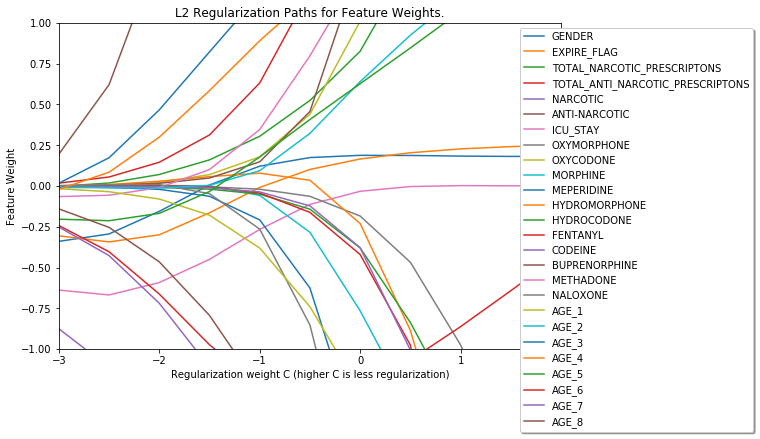

In [24]:
plt.clf()
fig = plt.figure()
ax = plt.subplot(111)

for f in feats:
    plt.plot(Rpath2.index.values, Rpath2[[f]], label=f)

plt.xlim([-3, 2])
plt.ylim([-1, 1])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*1.5, box.height * 1.5])

    # Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1), fancybox=True, shadow=True, ncol=1, prop={'size':10})

plt.title('L2 Regularization Paths for Feature Weights.')
plt.xlabel('Regularization weight C (higher C is less regularization)')
plt.ylabel('Feature Weight')
plt.show()

### L1 Paths

<Figure size 432x288 with 0 Axes>

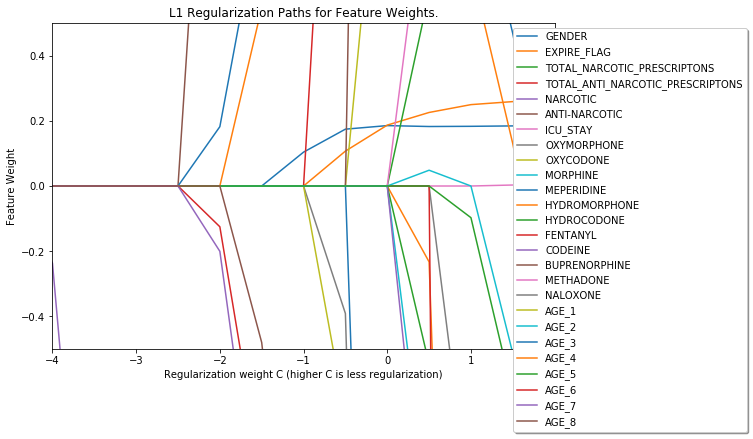

In [25]:
plt.clf()
fig = plt.figure()
ax = plt.subplot(111)

for f in feats:
    plt.plot(Rpath1.index.values, Rpath1[[f]], label=f)

plt.xlim([-4, 2])
plt.ylim([-0.5, 0.5])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*1.5, box.height * 1.5])

    # Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1), fancybox=True, shadow=True, ncol=1, prop={'size':10})

plt.title('L1 Regularization Paths for Feature Weights.')
plt.xlabel('Regularization weight C (higher C is less regularization)')
plt.ylabel('Feature Weight')
plt.show()

In [30]:
warnings.filterwarnings('ignore')
predicted = cross_val_predict(LogisticRegression(), X, Y["SIDE_EFFECTS_FLAG"], cv=10)
print("Accuracy Score: %f" %(metrics.accuracy_score(Y, predicted)))
print(metrics.classification_report(Y, predicted))

Accuracy Score: 0.975660
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     29243
         1.0       0.59      0.08      0.15       749

   micro avg       0.98      0.98      0.98     29992
   macro avg       0.78      0.54      0.57     29992
weighted avg       0.97      0.98      0.97     29992



In [31]:
predicted_df = pd.DataFrame(predicted)
predicted_df.columns=["PRED_FLAG"]
predicted_df.head()

,PRED_FLAG
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [32]:
Y_pred = pd.merge(Y, predicted_df, left_index=True, how='left', right_index=True)
correct_pred = Y_pred[Y_pred["SIDE_EFFECTS_FLAG"] == Y_pred["PRED_FLAG"]]
correct_pred_side_effects = correct_pred[correct_pred["SIDE_EFFECTS_FLAG"] == 1]
wrong_pred = Y_pred[Y_pred["SIDE_EFFECTS_FLAG"] != Y_pred["PRED_FLAG"]]
print("No of cases: %i" %len(Y))
print("No of correct predictions: %i" %len(correct_pred))
#print("No of correct predictions with side effects: %i" %len(correct_pred_side_effects))
print("No of wrong predictions: %i" %len(wrong_pred))

No of cases: 29992
No of correct predictions: 29262
No of wrong predictions: 730
